1000 sample from distribution
create function from distributions
create function 
```python
def fun(df, bins):
```
also use pytnon dictionaries
```python
dict = {'N(0,1)', np.radnom.normal(0,1,size)}
```
where
```python
df = pd.DataFram(dict)
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plotFaceGrid(df, _bins=10, _cumulative=False):
    """
    This function plots 
    """
    df = df.melt()
    df.head()
    g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=False)
    g = g.map(plt.hist, "value", bins=_bins, cumulative=_cumulative)

Create normal distribution dictionary varrying locations and scale

In [3]:
size = 10000

normal_dist = {
    'N(0:1)': np.random.normal(0, 1, size),
    'N(10:2)': np.random.normal(10, 2, size),
    'N(10:30)': np.random.normal(10, 30, size),
    'N(20:30)': np.random.normal(22, 30, size),
    'N(0:13)': np.random.normal(0, 13, size)
}
df = pd.DataFrame(normal_dist)
df.head()

,N(0:1),N(10:2),N(10:30),N(20:30),N(0:13)
0,0.247130,8.615280,-10.011480,10.187214,22.851559
1,-0.898800,9.597415,5.301893,48.310808,-6.040104
2,-0.022407,9.761083,21.606483,-3.167764,-0.803528
3,1.104741,8.622935,30.894727,-13.078218,13.319382
4,-1.508300,7.475486,-21.938926,-25.549059,6.930296


## Normal 

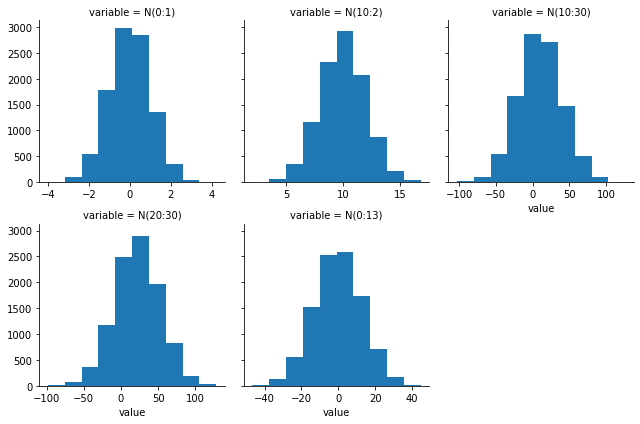

In [4]:
plotFaceGrid(df)

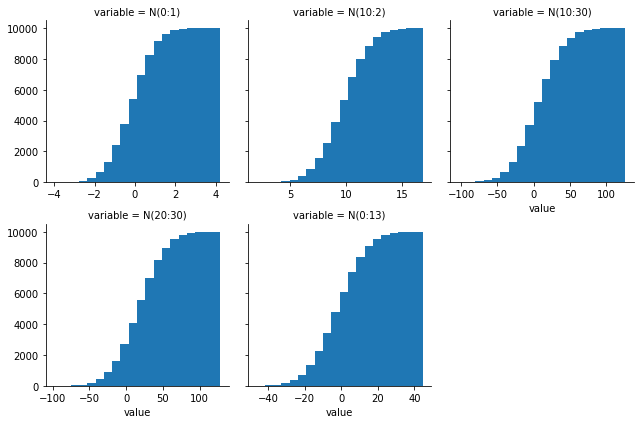

In [5]:
plotFaceGrid(df, _bins=20, _cumulative=True)

## Logit

In [6]:
import scipy as sp

In [7]:
logit_dist = normal_dist
for key, value in logit_dist.items():
    logit_dist[key] = sp.special.expit(value)

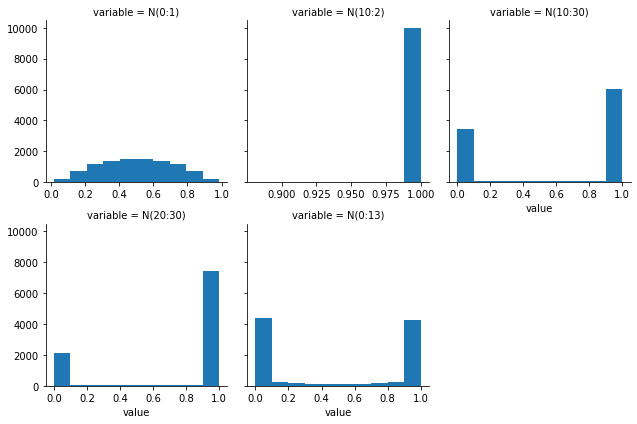

In [8]:
plotFaceGrid(pd.DataFrame(logit_dist))

## Poisson
Create poisson distribution dictionary varrying lambda size

In [9]:
poisson_dist = {
    'P(0.1)': np.random.poisson(0.1, size),
    'P(0.2)': np.random.poisson(0.2, size),
    'P(0.3)': np.random.poisson(0.3, size),
    'P(0.7)': np.random.poisson(0.7, size),
    'P(0:13)': np.random.poisson(0.13, size) 
}

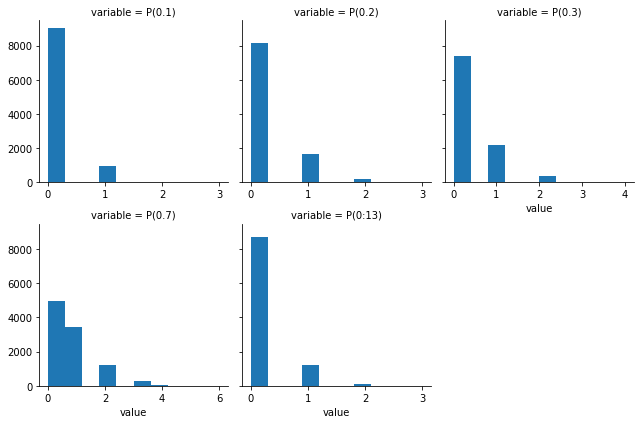

In [10]:
plotFaceGrid(pd.DataFrame(poisson_dist))

## Beta

Create beta distributions varrying alpha and beta

In [11]:
def get_mean(alpha, beta):
    return alpha/(alpha + beta)

def get_var(alpha, beta):
    return alpha*beta/((alpha+beta)**2 + (alpha+beta+1))

In [12]:
beta_dist = {
    'B(1:1)': np.random.beta(1, 1, size),
    'B(10:.2)': np.random.beta(10, .2, size),
    'B(10:30)': np.random.beta(10, 30, size),
    'B(20:30)': np.random.beta(22, 30, size),
    'B(1:13)': np.random.beta(1, 13, size) 
}

In [13]:
beta_dist_mean_var = {
    'B(1:1)': {get_mean(1, 1), get_var(1, 1)},
    'B(10:0.2)': {get_mean(10, 0.2), get_var(10, .2)},
    'B(10:30)': {get_mean(10, 30), get_var(10, 30)},
    'B(20:30)': {get_mean(20, 30), get_var(20, 30)},
    'B(1:13)': {get_mean(1, 13), get_var(1, 13)}
}

In [14]:
beta_dist_mean_var

{'B(1:1)': {0.14285714285714285, 0.5},
 'B(10:0.2)': {0.017355085039916698, 0.9803921568627452},
 'B(10:30)': {0.18281535648994515, 0.25},
 'B(20:30)': {0.23520188161505293, 0.4},
 'B(1:13)': {0.061611374407582936, 0.07142857142857142}}

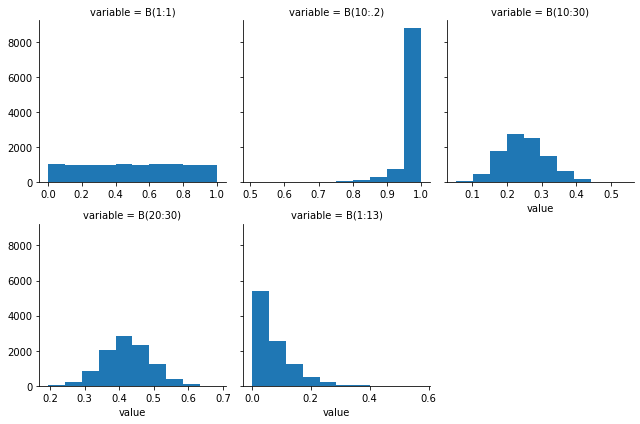

In [15]:
plotFaceGrid(pd.DataFrame(beta_dist))

## Lognormal

Create lognormal distribution varrying mean and sigma

In [16]:
lognormal_dist = {
    'L(0:1)': np.random.lognormal(0, 1, size),
    'L(10:2)': np.random.lognormal(10, 2, size),
    'L(3:1)': np.random.lognormal(3, 1, size),
    'L(20:30)': np.random.lognormal(22, 30, size),
    'L(0:13)': np.random.lognormal(0, 13, size)
}

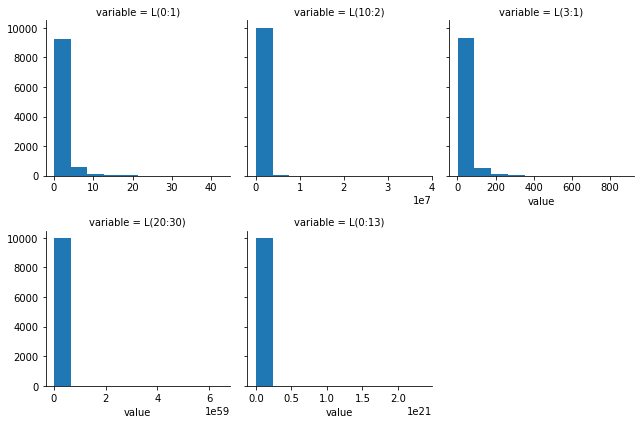

In [17]:
plotFaceGrid(pd.DataFrame(lognormal_dist))

# Stan

In [18]:
import utils.stan_utility as stan_utility
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
import seaborn as sns
import pandas as pd

import scipy.stats as stats
from scipy.stats import kde

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

### 1. Gamma family

create gamma distribution function in stan

In [20]:
with open('stan_model/gamma.stan') as file:
    print(file.read())

data {
    real alpha;
    real beta;
}

generated quantities {
    real gamma = gamma_rng(alpha, beta);
    real inv_gamma = inv_gamma_rng(alpha, beta);
}



In [21]:
gamma_model = stan_utility.compile_model('stan_model/gamma.stan')

Using cached StanModel


In [22]:
sim = gamma_model.sampling(data={'alpha': 3, 'beta': 2},
                          algorithm="Fixed_param",
                          iter=1000,
                          warmup=0,
                          chains=1,
                          seed=25052020)

In [23]:
params=sim.extract()
gamma=params['gamma']
inv_gamma=params['inv_gamma']

Plot received data using $\alpha = 3 \land \beta  = 2 $

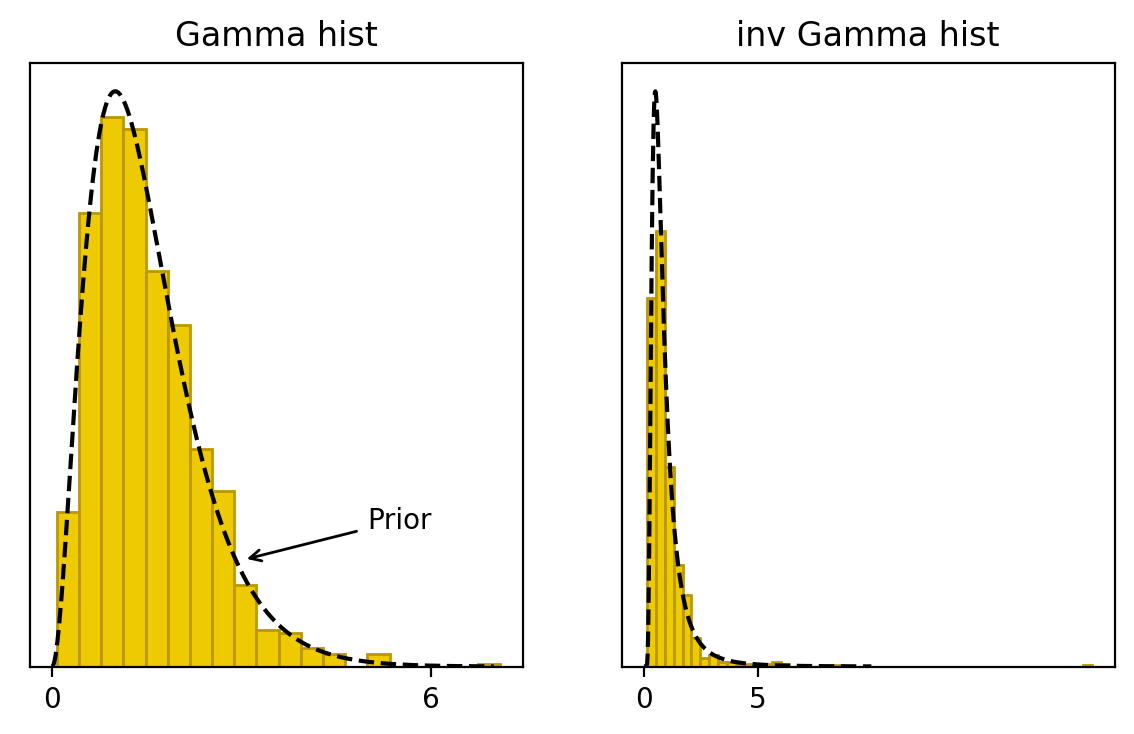

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax1=axes[0]
ax1.hist(gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,7,500)
alpha = 3
beta = 2
ax1.plot(x,stats.gamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
ax1.set_xticks([0,6])
ax1.set_yticks([])
ax1.set_title(r'Gamma hist')
ax1.annotate('Prior',xy=(3,0.1),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})

ax2=axes[1]
ax2.hist(inv_gamma,bins=50,color=dark,edgecolor=dark_highlight,density=True)
x2=np.linspace(0,10,500)
ax2.plot(x2,stats.invgamma.pdf(x2,a=alpha,scale=beta),color='black',linestyle='--')
ax2.set_yticks([])
ax2.set_xticks([0,5])
ax2.set_title('inv Gamma hist')
plt.show()

Create stan model for gamma dist. tuning 

In [25]:
with open('stan_model/gamma_tune.stan') as file:
    print(file.read())

functions {
    vector gammaUnknown (vector y, vector theta, real[] x_r, int[] x_i) {
        vector[3] gammas;
        gammas[1] = gamma_cdf(theta[1], exp(y[1]), exp(y[2])) - exp(y[3]);
        gammas[2] = gamma_cdf(theta[2], exp(y[1]), exp(y[2])) - exp(y[3]) - 0.98;
        gammas[3] = exp(y[1])/exp(y[2]) - 7;
        return gammas;
    }
}

data {
    real lowerBound;
    real upperBound;
    real alphaGuess;
    real betaGuess;
    real probGuess;
}

transformed data {
    vector[3] y;
    real x_r[0];
    int x_i[0];
    vector[2] theta = [lowerBound, upperBound]';
    vector[3] y_guess = [log(alphaGuess), log(betaGuess), log(probGuess)]';
    y = algebra_solver(gammaUnknown, y_guess, theta, x_r, x_i);
}

generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}



In [26]:
gamma_tuning=stan_utility.compile_model('stan_model/gamma_tune.stan')

Using cached StanModel


In [27]:
data=dict(lowerBound=5, upperBound=10, alphaGuess=8, betaGuess=1, probGuess=0.09)
tuned = gamma_tuning.sampling(data=data,
                                seed=1052020,
                                algorithm="Fixed_param",
                                iter=1000, 
                                warmup=0,
                                chains=1)

In [28]:
alpha = np.round(tuned.extract()['alpha'][0])
beta = np.round(tuned.extract()['beta'][0])
print(f'alpha: {alpha}\tbeta: {beta}')

alpha: 47.0	beta: 7.0


Create gamma distribution using tuned $\alpha$ and $\beta$

In [29]:
sim = gamma_model.sampling(data={'alpha': alpha, 'beta': beta},
                          algorithm="Fixed_param",
                          iter=1000,
                          warmup=0,
                          chains=1,
                          seed=25052020)

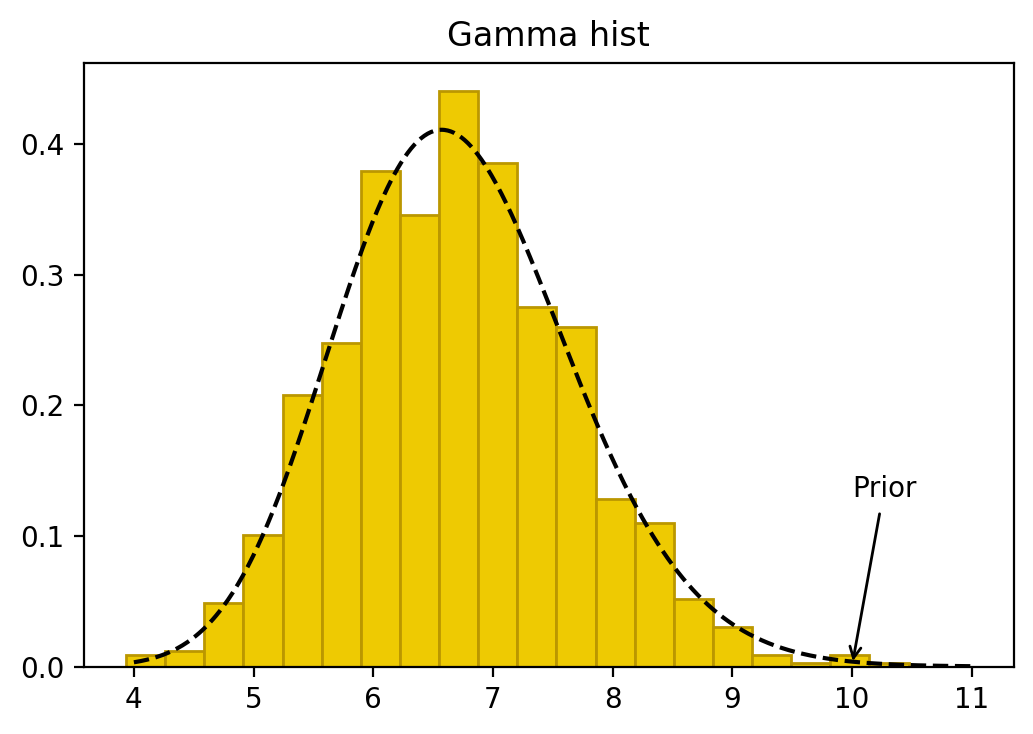

In [30]:
params=sim.extract()
gamma=params['gamma']

plt.hist(gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(4,11,500)
plt.plot(x,stats.gamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
plt.title(r'Gamma hist')
plt.annotate('Prior',xy=(10, 0),xytext=(10,0.13),arrowprops={'arrowstyle':'->'})

plt.show()

### Inv gamma 

Create model for inverse gamma dist. tuning

In [31]:
with open('stan_model/inv_gamma_tune.stan') as file:
    print(file.read())

functions {
    vector gammaUnknown (vector y, vector theta, real[] x_r, int[] x_i) {
        vector[2] gammas;
        gammas[1] = inv_gamma_cdf(theta[1], exp(y[1]), exp(y[2])) - 0.01;
        gammas[2] = inv_gamma_cdf(theta[2], exp(y[1]), exp(y[2])) - 0.98;
        return gammas;
    }
}

data {
    real lowerBound;
    real upperBound;
    real alphaGuess;
    real betaGuess;
}

transformed data {
    vector[2] y;
    real x_r[0];
    int x_i[0];
    vector[2] theta = [lowerBound, upperBound]';
    vector[2] y_guess = [log(alphaGuess), log(betaGuess)]';
    y = algebra_solver(gammaUnknown, y_guess, theta, x_r, x_i);
}

generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}



In [32]:
inv_gamma_tuning = stan_utility.compile_model('stan_model/inv_gamma_tune.stan')

Using cached StanModel


In [33]:
data=dict(lowerBound=5, upperBound=10, alphaGuess=15, betaGuess=92)
inv_gamma_tuned = inv_gamma_tuning.sampling(data=data,
                                            seed=1052020,
                                            algorithm="Fixed_param",
                                            iter=1, 
                                            warmup=0,
                                            chains=1)

In [34]:
alpha = np.round(inv_gamma_tuned.extract()['alpha'][0])
beta = np.round(inv_gamma_tuned.extract()['beta'][0])
print(f'alpha: {alpha}\tbeta: {beta}')

alpha: 40.0	beta: 280.0


Plot inv gamma dist using tuned $\alpha$ and $\beta$ 

In [35]:
sim = gamma_model.sampling(data={'alpha': alpha, 'beta': beta},
                          algorithm="Fixed_param",
                          iter=1000,
                          warmup=0,
                          chains=1,
                          seed=25052020)

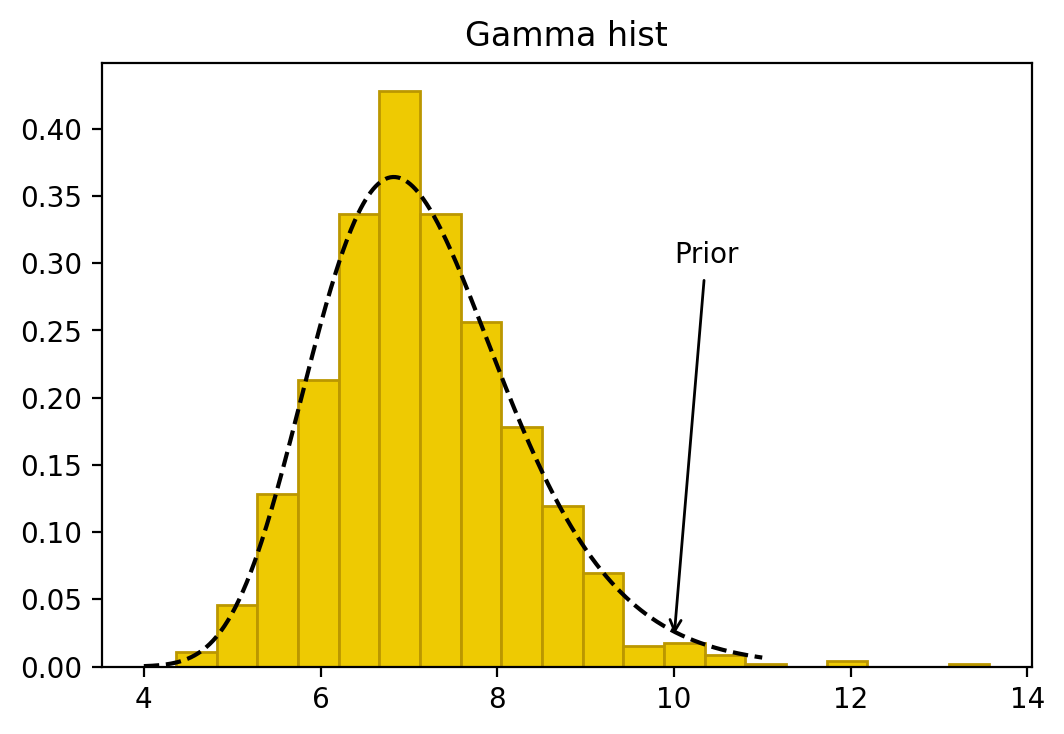

In [36]:
params=sim.extract()
inv_gamma=params['inv_gamma']

plt.hist(inv_gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(4,11,500)
plt.plot(x,stats.invgamma.pdf(x,a=alpha,scale=beta),color='black',linestyle='--')
plt.title(r'Gamma hist')
plt.annotate('Prior',xy=(10,0.02),xytext=(10,0.30),arrowprops={'arrowstyle':'->'})

plt.show()

### 2. Negative binomial distribution. Negative binomial distribution can be used in order to relax the constraints of equal mean and variance of Poissson distribution. Using both concentration and dispersion parametrization sample from negative binomial with fixed mean and see how it behaves in comparison to the Poisson with the same mean.

Create stan model with negative binormal distibution

In [37]:
with open('stan_model/negative.stan', 'r') as file:
    print(file.read())

data {
    real alpha;
    real mean_;
    real phi;
}

generated quantities {
    real neg_con = neg_binomial_rng(alpha, alpha/mean_);
    real neg_dis = neg_binomial_2_rng(mean_, phi);

    real poisson_con = poisson_rng(neg_con);
    real poisson_dis = poisson_rng(neg_dis);
}



In [38]:
negative_model = stan_utility.compile_model('stan_model/negative.stan')

Using cached StanModel


In [39]:
data = dict(mean_=10, alpha=2, phi=2, M=1000)
negative_sampled = negative_model.sampling(data=data,
                                            seed=1052020,
                                            algorithm="Fixed_param",
                                            iter=1000, 
                                            warmup=0,
                                            chains=1)

In [40]:
params=negative_sampled.extract()
neg_bin_con=params['neg_con']
poisson_con=params['poisson_con']
neg_bin_dis=params['neg_dis']
poisson_dis=params['poisson_dis']

In [41]:
data

{'mean_': 10, 'alpha': 2, 'phi': 2, 'M': 1000}

In [42]:
beta = data['alpha']/data['mean_']
x_con=np.linspace(0, 80, 81)
x_dis=np.linspace(0, 45, 46)
nbinom_fun_con = stats.nbinom(data['alpha'], beta/(beta+1))
nbinom_fun_dis = stats.nbinom(data['phi'], data['phi']/(data['mean_']+data['phi']))

nbinom_pmf_con = []
nbinom_pmf_dis = []

for i in range(0, len(x_con)):
    nbinom_pmf_con.append( nbinom_fun_con.pmf( x_con[i] ))
for i in range(0, len(x_dis)):
    nbinom_pmf_dis.append( nbinom_fun_dis.pmf( x_dis[i] ))
    

/home/artur/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/artur/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/artur/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/artur/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


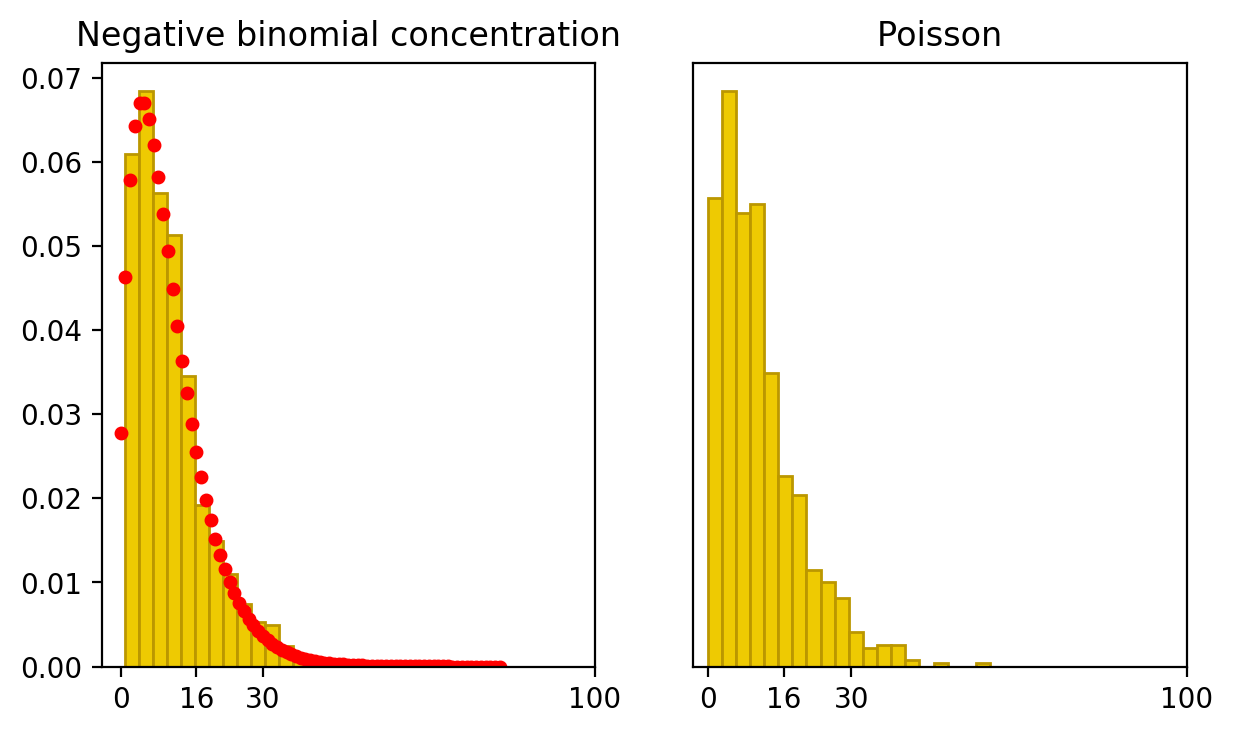

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(neg_bin_con,bins=20, color=dark, edgecolor=dark_highlight, density=True)
ax1.plot(x_con, nbinom_pmf_con,  'ro', markersize=4)
ax1.set_xticks([0,16,30,100])
#ax1.set_yticks([])
ax1.set_title(r'Negative binomial concentration')

ax2=axes[1]
ax2.hist(poisson_con,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_yticks([])
ax2.set_xticks([0,16,30,100])
ax2.set_title('Poisson')

plt.show()

/home/artur/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/artur/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


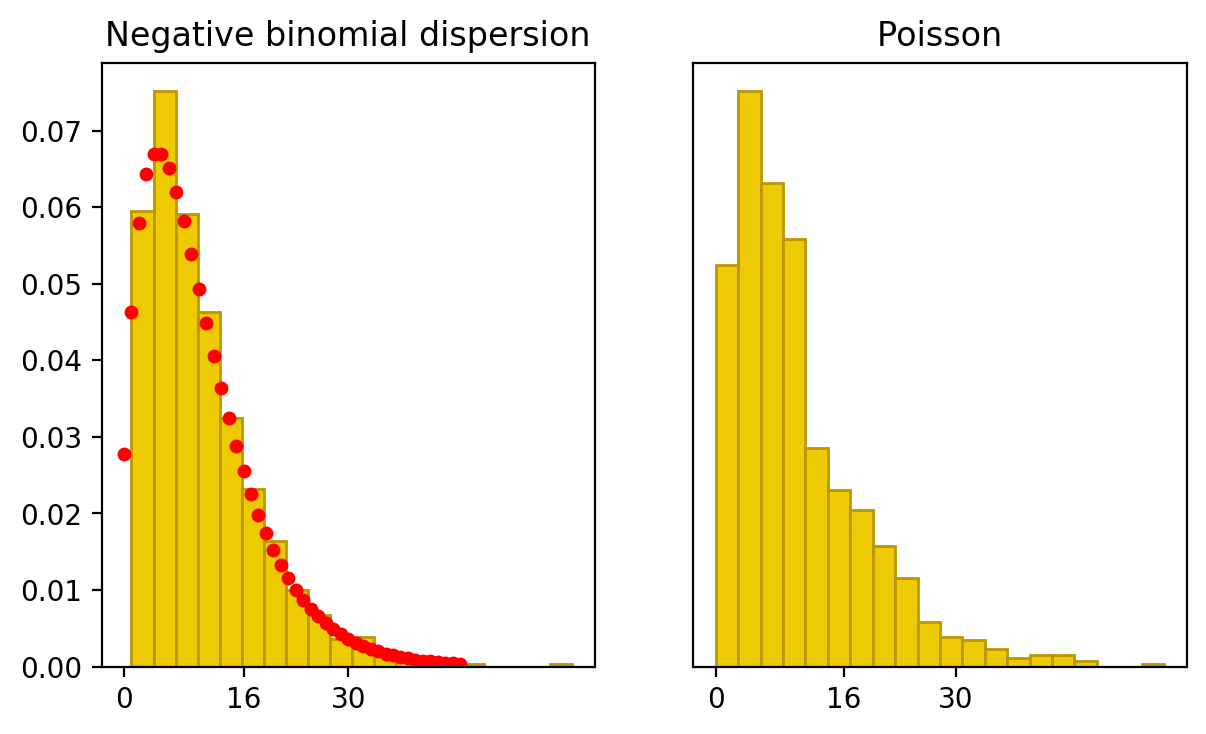

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(neg_bin_dis,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax1.plot(x_dis, nbinom_pmf_dis,  'ro', markersize=4)
ax1.set_xticks([0,16,30])
#ax1.set_yticks([])
ax1.set_title('Negative binomial dispersion')

ax2=axes[1]
ax2.hist(poisson_dis,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_yticks([])
ax2.set_xticks([0,16,30])
ax2.set_title('Poisson')

plt.show()

### 3. Student-t family distributions. Student-t distributions can be considered generalizations of Gaussian distributions with varying scale. Use both degrees of freedom and dispersion parametrizations to see how changing parameters moves from normal distribution. Take a special case of degrees of freedom equal to 1, as this is Cauchy distribution. See how mean and variance behave while you increase number of samples.

Create stan model for student t distribution

In [45]:
with open('stan_model/student_t.stan', 'r') as file:
    print(file.read())

data {
    real nu;    //degrees of freedom
    real mu;    //location
    real sigma; //scale
}

generated quantities {
    real y_sim = student_t_rng(nu, mu, sigma);
}




In [46]:
student_t = stan_utility.compile_model('stan_model/student_t.stan')

Using cached StanModel


In [47]:
R1=10
sim_nm1=student_t.sampling(data={'nu':1, 'mu':0, 'sigma':2},
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
R2=100
sim_nm2=student_t.sampling(data={'nu':1, 'mu':0, 'sigma':2},
                      algorithm="Fixed_param", 
                      iter=R2, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

In [48]:
params1=sim_nm1.extract()
student1=params1['y_sim']

params2=sim_nm2.extract()
student2=params2['y_sim']

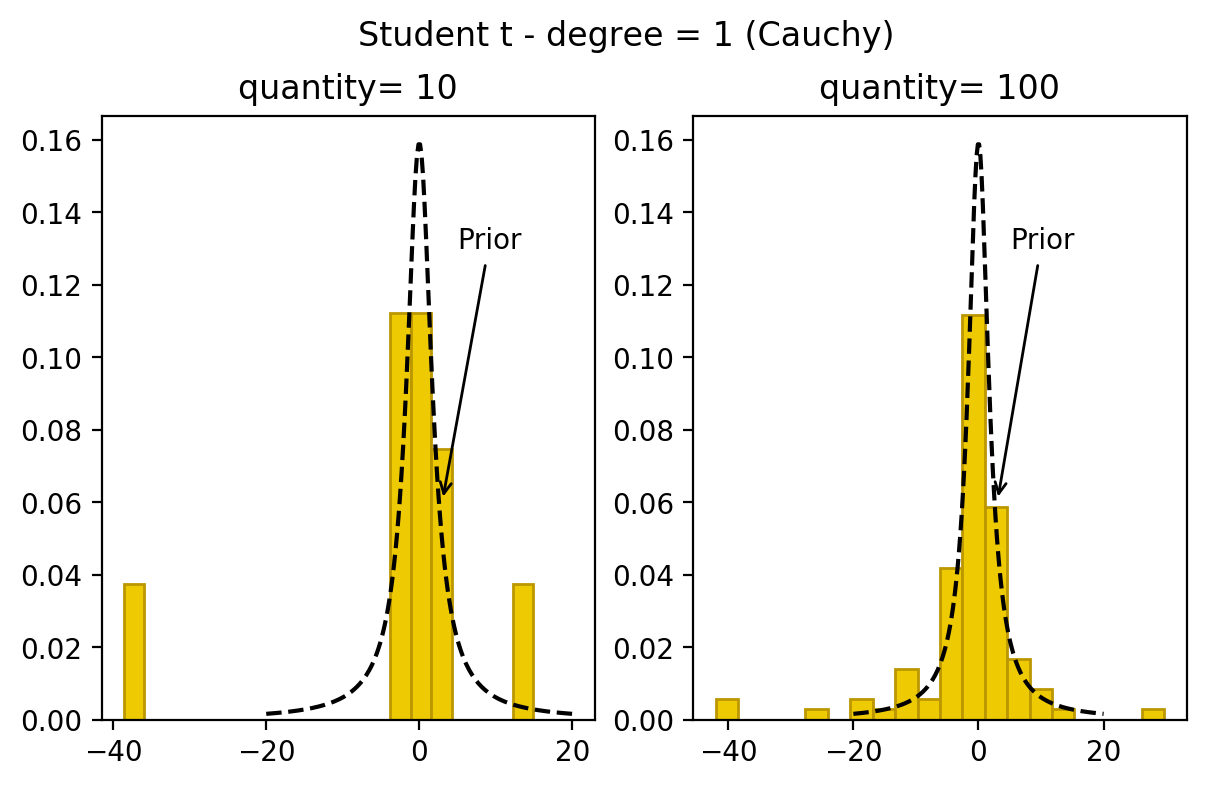

In [49]:
x=np.linspace(-20,20,200)

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

fig.suptitle('Student t - degree = 1 (Cauchy)',x= 0.5,y=1, fontsize=12)

ax1=axes[0]
ax1.hist(student1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.plot(x,stats.t.pdf(x,df=1,loc=0,scale=2),color='black',linestyle='--')
# ax1.set_xticks([0,6])
# ax1.set_yticks([])
ax1.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
ax1.set_title(r'quantity= 10')

ax2=axes[1]
ax2.hist(student2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.plot(x,stats.t.pdf(x,df=1,loc=0,scale=2),color='black',linestyle='--')
ax2.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
ax2.set_title(r'quantity= 100')

plt.show()

In [50]:
np.median(student1)

-0.11662346981823733

In [51]:
np.median(student2)

-0.1896492129414286

In [52]:
az.hpd(student1,0.1)

/home/artur/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)


array([-38.58655311,  14.92231042])

In [53]:
az.hpd(student2,0.1)

array([-18.4741539 ,  11.59037126])

In [54]:
R1=10
sim_nm1=student_t.sampling(data={'nu':3, 'mu':5, 'sigma':4},
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
R2=100
sim_nm2=student_t.sampling(data={'nu':3, 'mu':5, 'sigma':4},
                      algorithm="Fixed_param", 
                      iter=R2, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

In [55]:
params1=sim_nm1.extract()
student1=params1['y_sim']

params2=sim_nm2.extract()
student2=params2['y_sim']

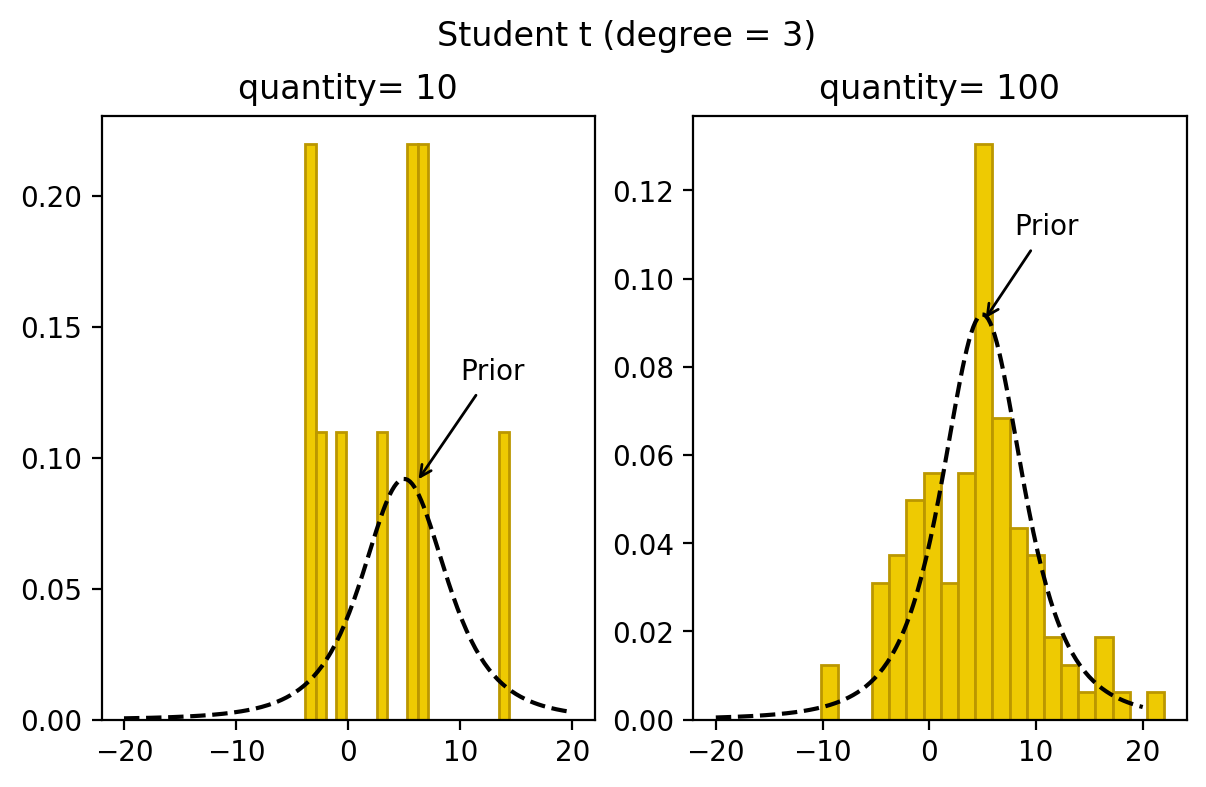

In [56]:
x=np.linspace(-20,20,200)

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

fig.suptitle('Student t (degree = 3)',x= 0.5,y=1, fontsize=12)

ax1=axes[0]
ax1.hist(student1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.plot(x,stats.t.pdf(x, df=3, loc=5, scale=4),color='black',linestyle='--')
ax1.annotate('Prior',xy=(6,0.09),xytext=(10,0.13),arrowprops={'arrowstyle':'->'})
ax1.set_title(r'quantity= 10')

ax2=axes[1]
ax2.hist(student2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.plot(x,stats.t.pdf(x, df=3, loc=5, scale=4),color='black',linestyle='--')
ax2.annotate('Prior',xy=(5,0.09),xytext=(8,0.11),arrowprops={'arrowstyle':'->'})
ax2.set_title(r'quantity= 100')

plt.show()

In [57]:
np.median(student1)

4.063107480371265

In [58]:
np.median(student2)

4.834390169040947

In [59]:
az.hpd(student1,0.1)

/home/artur/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)


array([-3.82082255, 14.39047321])

In [60]:
az.hpd(student2,0.1)

array([-5.01137564, 16.53504135])

### 4. Multivariate normal distributions Consider density plots and 2d histograms for visualisation of behavior of 2 dimensional Multivariate normal. Use the correlation matrix decompositon of covariance matrix to see how individual variances and correlations infulence the distribution. For 3 and 4 dimensional normal distributions observe the marginals of variables with histograms.

In [61]:
with open('stan_model/normal.stan') as file:
    print(file.read())

data {
    vector[2] mu;       // location
    matrix[2,2] sigma;  // scale
}


generated quantities {
    vector[2] result = multi_normal_rng(mu,sigma);
}



In [62]:
normal = stan_utility.compile_model('stan_model/normal.stan')

Using cached StanModel


In [63]:
data = dict(mu=[2.0, 8], sigma=[[1, .3],[.3, 2]])
negative_eta_sampled = normal.sampling(data=data,
                                            seed=1052020,
                                            algorithm="Fixed_param",
                                            iter=1000, 
                                            warmup=0,
                                            chains=1)
params_negative_eta = negative_eta_sampled.extract()
y_sim = params_negative_eta['result'].T

In [64]:
y_sim0 = y_sim[0].flatten()
y_sim1 = y_sim[1].flatten()

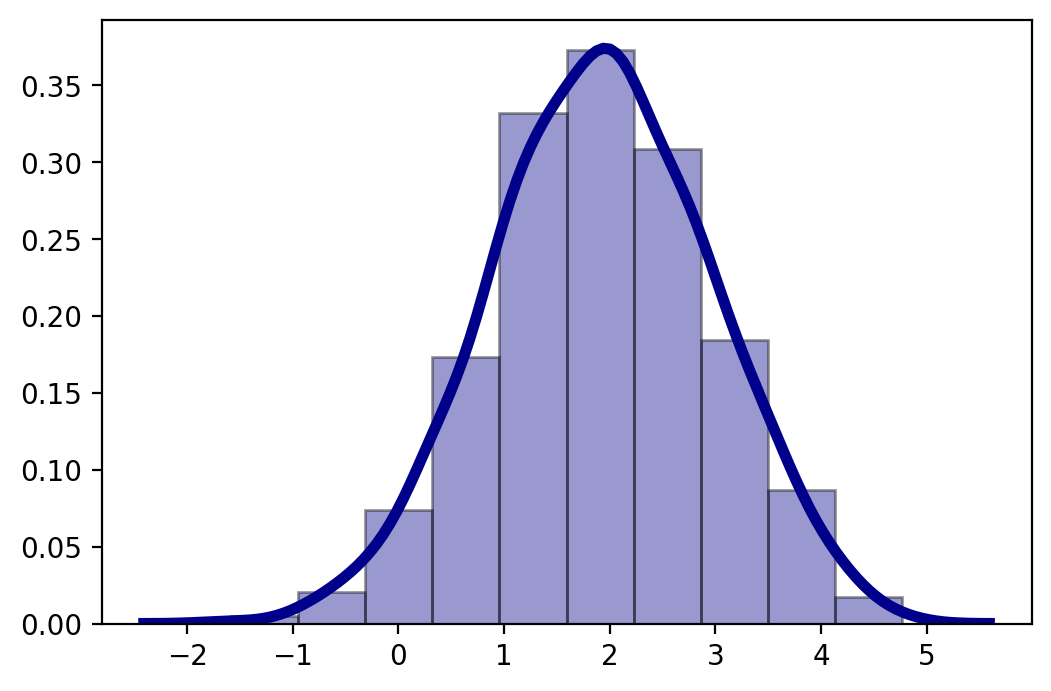

In [65]:
# Density Plot and Histogram of all arrival delays
sns.distplot(y_sim[0].flatten(), hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [66]:
to_df = np.array([y_sim0, y_sim1]).T

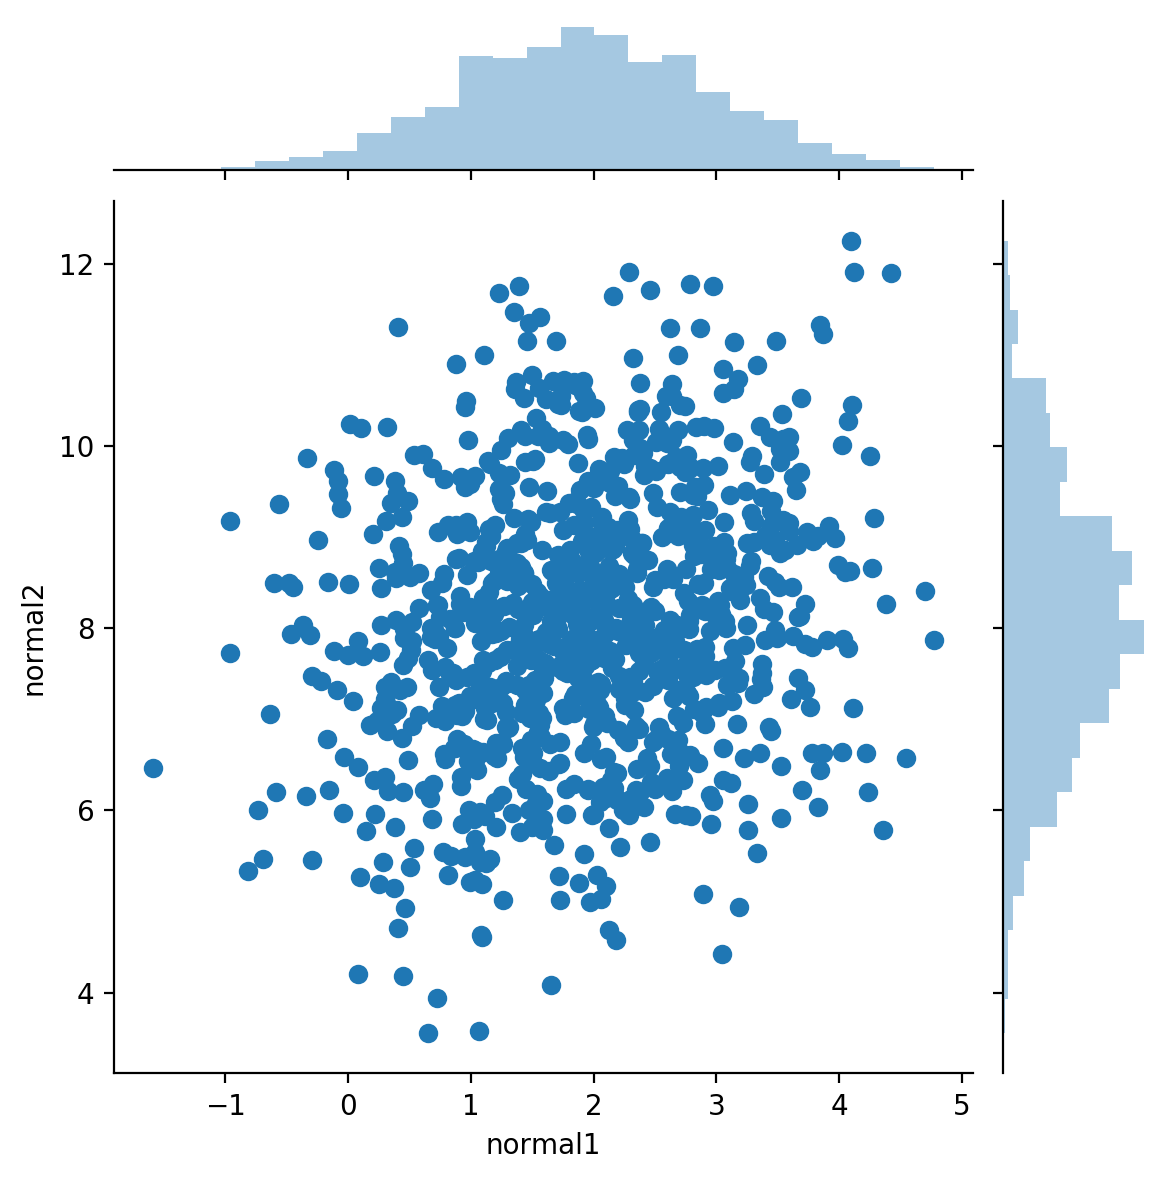

In [67]:
df = pd.DataFrame(to_df, columns=["normal1", "normal2"])
sns.jointplot(x="normal1", y="normal2", data=df);

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.00723426, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.00723426,
         0.        , 0.        , 0.00723426, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.01446852,
         0.00723426, 0.        , 0.        , 0.00723426, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00723426, 0.00723426, 0.        , 0.        , 0.        ,
         0.01446852, 0.02170278

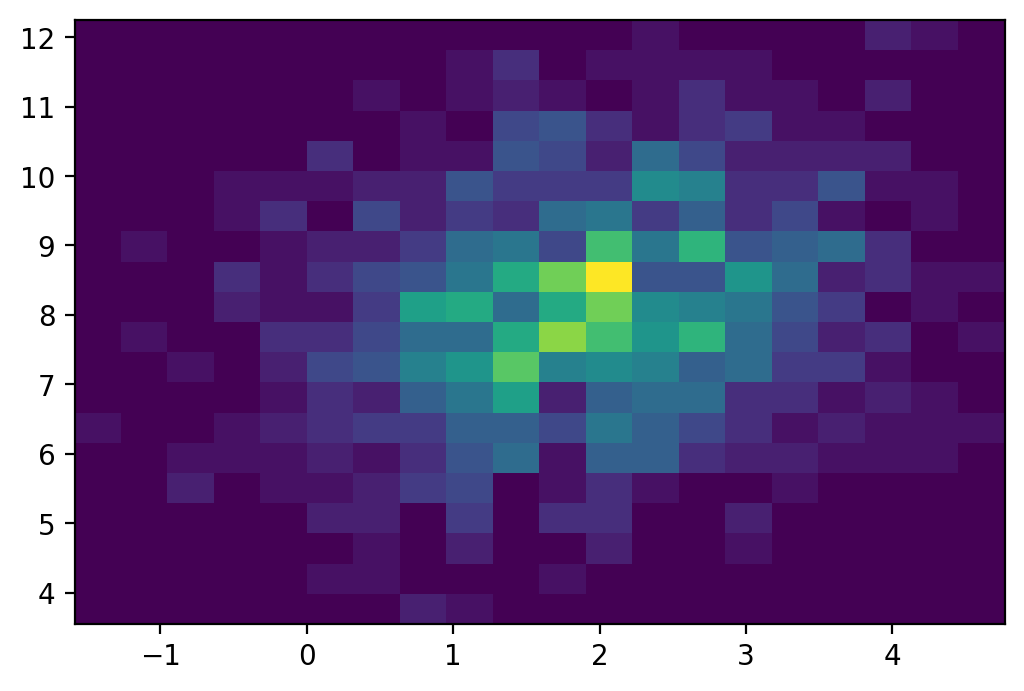

In [68]:
plt.hist2d(y_sim0, y_sim1, bins=20, density=True)

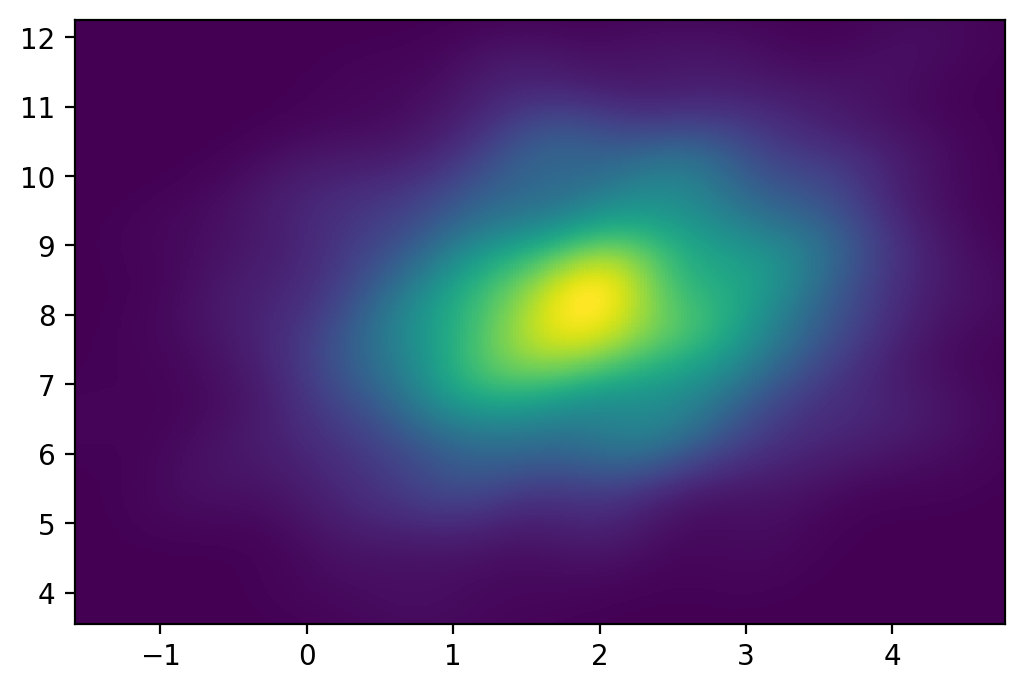

In [69]:
x= np.array(y_sim0)
y = np.array(y_sim1)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()

Create stan model for 4 normal distributions at the same time

In [70]:
with open('stan_model/normal4.stan', 'r') as file:
    print(file.read())

data {
    vector[4] mu;       // location
    matrix[4,4] sigma;  // scale
}


generated quantities {
    vector[4] result = multi_normal_rng(mu,sigma);
}



In [71]:
normal_4 = stan_utility.compile_model('stan_model/normal4.stan')

Using cached StanModel


In [72]:
mu = [2, 8, 12, 4]
sigma = [[1, 0.3, 0.5, 0.7], [0.3, 2, 0.8, 0.2],[0.5, 0.8, 12, 0.3], [0.7, 0.2, 0.3, 1]]

In [73]:
R1=100
sim_nm1=normal_4.sampling(data={'mu':mu, 'sigma':sigma},
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

In [74]:
params1 = sim_nm1.extract()
result = params1['result']
result = result.T

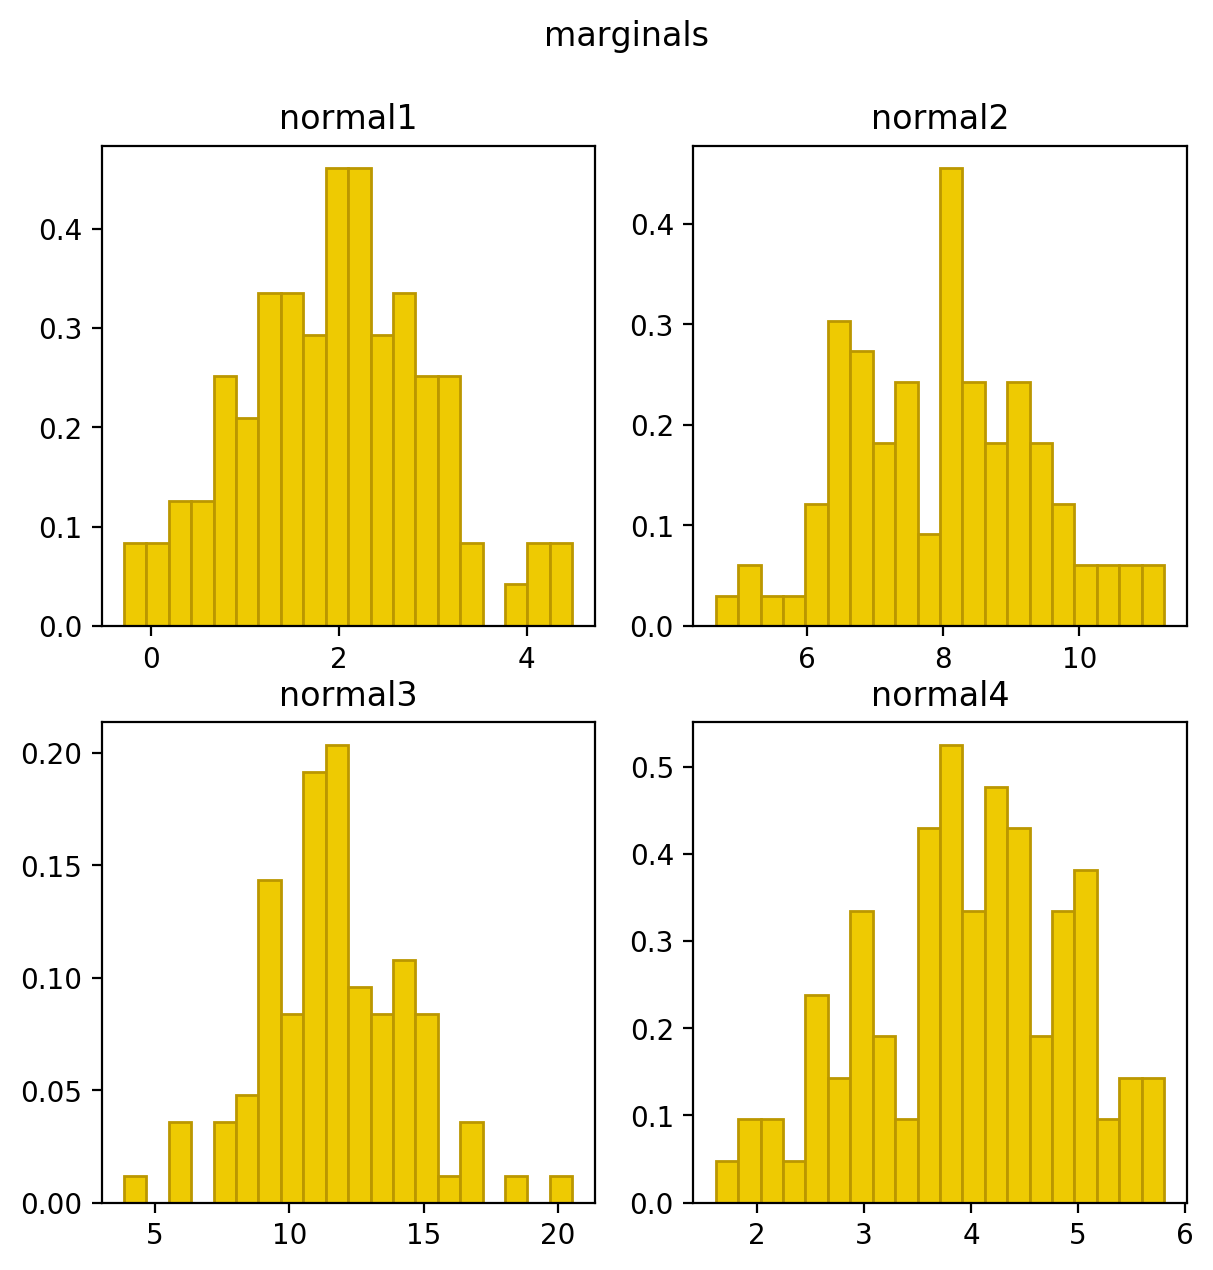

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

fig.suptitle('marginals',x= 0.5,y=0.97, fontsize=12)

ax1=axes[0][0]
ax1.hist(result[0],bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.set_title(r'normal1')

ax2=axes[0][1]
ax2.hist(result[1],bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'normal2')

ax2=axes[1][0]
ax2.hist(result[2],bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'normal3')

ax2=axes[1][1]
ax2.hist(result[3],bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'normal4')

plt.show()